In [1]:
# prompt: how to fetch text from wikipedia using python

!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=0a582d181f71542b0bba3d06fc13ad6ed0fbf1d89f655231027c5481f86ab250
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [2]:
import wikipedia
page = wikipedia.page("Albert Einstein")
text=page.content
print(text)

Albert Einstein ( EYEN-styne; German: [ˈalbɛɐt ˈʔaɪnʃtaɪn] ; 14 March 1879 – 18 April 1955) was a German-born theoretical physicist who is widely held to be one of the greatest and most influential scientists of all time. Best known for developing the theory of relativity, Einstein also made important contributions to quantum mechanics, and was thus a central figure in the revolutionary reshaping of the scientific understanding of nature that modern physics accomplished in the first decades of the twentieth century. His mass–energy equivalence formula E = mc2, which arises from relativity theory, has been called "the world's most famous equation". He received the 1921 Nobel Prize in Physics "for his services to theoretical physics, and especially for his discovery of the law of the photoelectric effect", a pivotal step in the development of quantum theory. His work is also known for its influence on the philosophy of science. In a 1999 poll of 130 leading physicists worldwide by the Br

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
!pip install wikipedia
import wikipedia

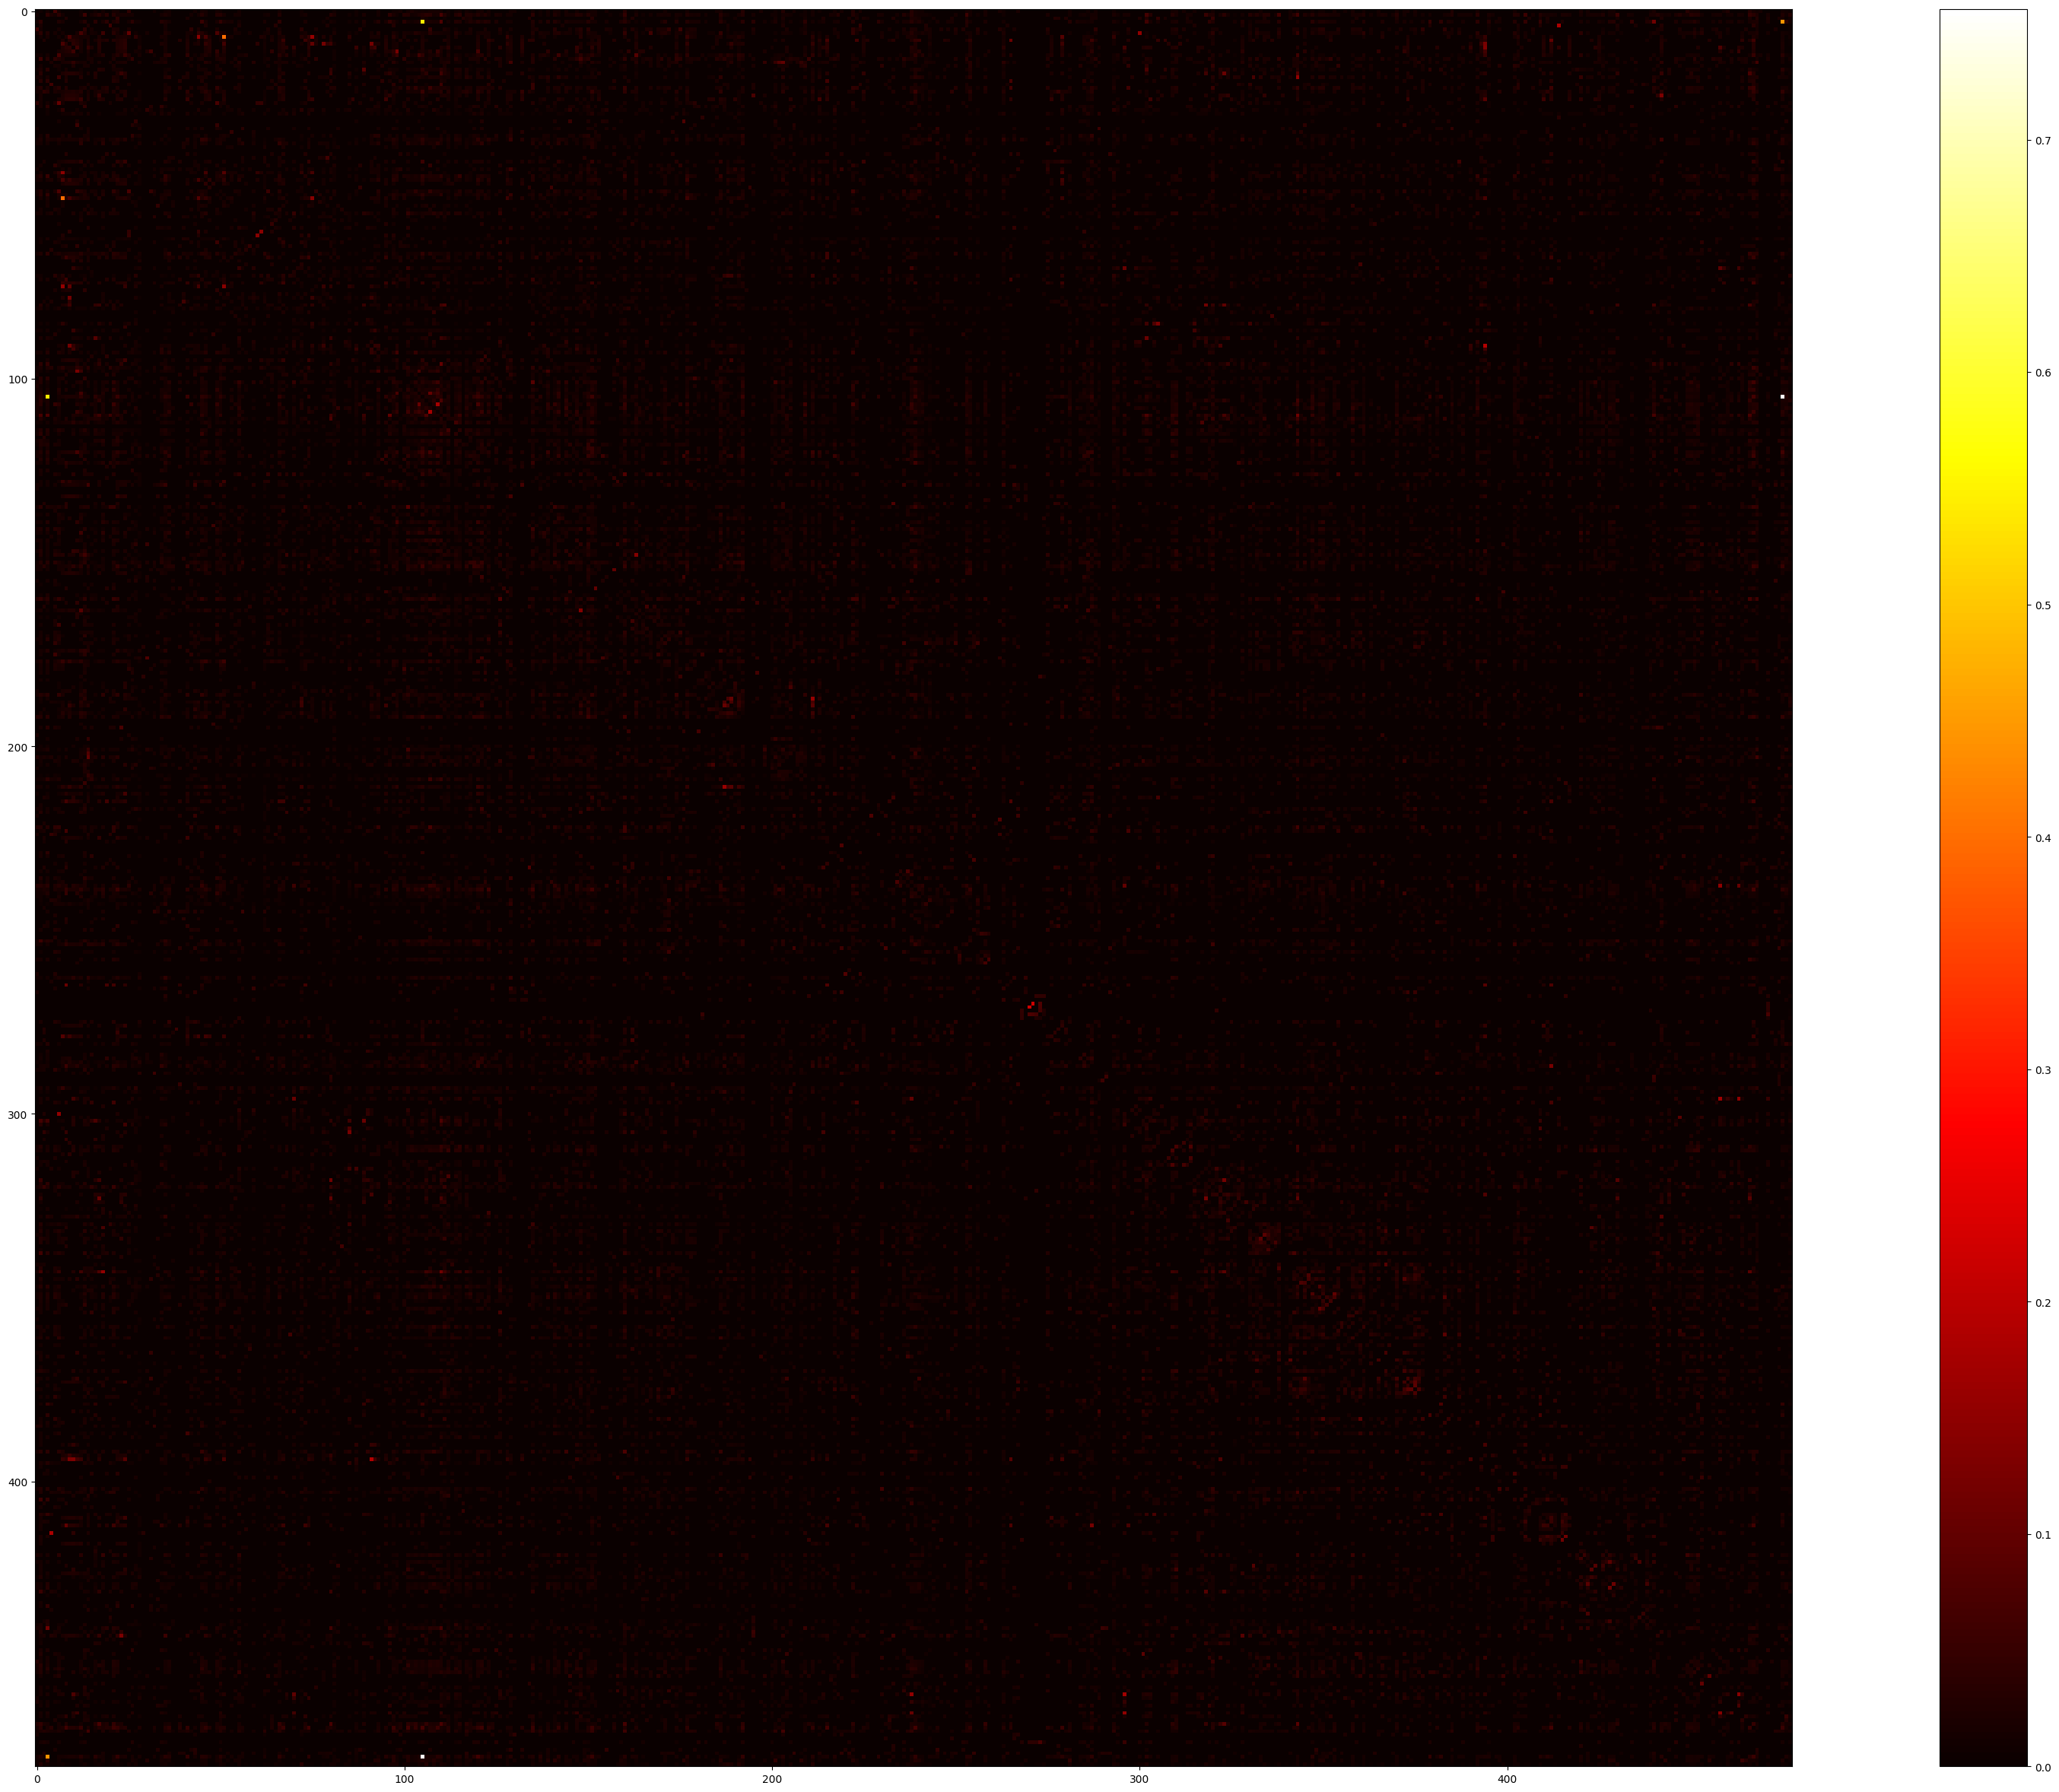

In [5]:
import nltk
import matplotlib.pyplot as plt

def get_wikipedia_text(query):
  """
  Fetches the Wikipedia page content for the given query.

  Args:
      query: Search query as a string.

  Returns:
      String containing the Wikipedia page content.
  """
  try:
    page = wikipedia.page(query)
    return page.content
  except wikipedia.exceptions.PageError:
    print(f"Page not found for query: {query}")
    return ""

def calculate_similarity(sentence1, sentence2, n):
  """
  Calculates Jaccard similarity between two sentences based on n-grams.

  Args:
      sentence1: First sentence as a string.
      sentence2: Second sentence as a string.
      n: Size of n-grams (e.g., 2 for bigrams).

  Returns:
      Jaccard similarity score between 0 and 1.
  """
  tokens1 = nltk.word_tokenize(sentence1.lower())
  tokens2 = nltk.word_tokenize(sentence2.lower())

  ngrams1 = set(nltk.ngrams(tokens1, n))
  ngrams2 = set(nltk.ngrams(tokens2, n))

  intersection = len(ngrams1.intersection(ngrams2))
  union = len(ngrams1.union(ngrams2))

  if union == 0:
    return 0  # Avoid division by zero
  else:
    return intersection / union

def main():
  # Hypothetical function to fetch text from Wikipedia (replace with your method)
  wiki_text = get_wikipedia_text("Albert Einstein")

  # Preprocess text
  sentences = nltk.sent_tokenize(wiki_text)
  sentences = [sentence.lower() for sentence in sentences]  # Lowercase

  # Iterate through each sentence pair
  for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
      sentence1 = sentences[i]
      sentence2 = sentences[j]

      # Calculate similarity using Jaccard (replace with Cosine if needed)
      similarity = calculate_similarity(sentence1, sentence2, 2)  # Bigrams (change n)
      #print(f"Similarity between sentence {i+1} and {j+1}: {similarity}")
  similarity_matrix = [[0 for _ in range(len(sentences))] for _ in range(len(sentences))]

  for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
      similarity_matrix[i][j] = similarity_matrix[j][i] = calculate_similarity(sentences[i], sentences[j], 2)

# Plot the heatmap
  plt.figure(figsize=(50, 30))
  plt.imshow(similarity_matrix, cmap='hot')
  plt.colorbar()
  plt.show()

if __name__ == "__main__":
  main()
